In [175]:
import pandas as pd
from math import sqrt
import matplotlib.pylab as plt
import random
from math import floor
import copy

In [92]:
col=['sepal_length','sepal_width','petal_length','petal_width','type']
data = pd.read_csv('iris.data', sep=",",names=col)
iris = pd.read_csv('iris.data', sep=",",names=col)
val_1 = iris["type"].unique()[0]
val_2 = iris["type"].unique()[1]
val_3 = iris["type"].unique()[2]

iris["type"] = iris["type"].map({val_1 :0, val_2 :1 , val_3:2})
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [97]:
def euclidean_distance(x, y):

    distance = 0
    for xi, yi in zip(x, y):
        distance += (xi-yi) ** 2

    return sqrt(distance)

In [98]:
def KNN(distanceFunction, k, dataSet, instance):

    point_dis = []


    for point in dataSet:


        dis = distanceFunction(instance, point[0:-1])

        point_dis.append([point, dis])

    point_dis = sorted(point_dis, key=lambda p: p[1])

    point_dis = point_dis[0:k]

    knnPoints = []
    for point in point_dis:
        knnPoints.append(point[0])


    label_occurrence = {}
    for point in knnPoints:
        if point[len(point)-1] not in label_occurrence:
            label_occurrence[point[len(point)-1]] = 1
        else:
            label_occurrence[point[len(point)-1]] += 1

    labels = sorted(list(label_occurrence.items()),
                    key=lambda key_num: key_num[1],
                    reverse=True)
    return labels[0][0]


In [99]:
def cross_validation(learningFunction, argumentOFLearningFunction, dS):


    averageError = 0

    foldsize = floor(len(dataSet)/10)

    folds=[]

    for fold in range(9):
         folds.append(dataSet[fold*foldsize:(fold+1)*foldsize])
    folds.append(dataSet[(10-1) * foldsize::])

    for index1, i in enumerate(folds):

        test = copy.deepcopy(i)
        train = []
        for index2, j in enumerate(folds):
            if index2 != index1:
                train = train + copy.deepcopy(j)

        foldError=0
        for point in test:

            argumentOFLearningFunction['instance'] = copy.deepcopy(point[0:-1])

            argumentOFLearningFunction['dataSet'] = copy.deepcopy(train)

            label = learningFunction(**argumentOFLearningFunction)

            if label != point[len(point)-1]:
                foldError += 1

        averageError += foldError/len(test)

    averageError /= 10

    return averageError


Part A:
K=1, 	Error=0.04
K=2, 	Error=0.04
K=3, 	Error=0.05333333333333333
K=4, 	Error=0.04666666666666667
K=5, 	Error=0.06666666666666668
K=6, 	Error=0.05333333333333333
K=7, 	Error=0.06666666666666668
K=8, 	Error=0.05333333333333333
K=9, 	Error=0.06666666666666667
K=10, 	Error=0.06
K=11, 	Error=0.06666666666666668
K=12, 	Error=0.06
K=13, 	Error=0.06
K=14, 	Error=0.06666666666666667
K=15, 	Error=0.07333333333333333
K=16, 	Error=0.06666666666666667
K=17, 	Error=0.07333333333333333
K=18, 	Error=0.08
K=19, 	Error=0.07333333333333333
K=20, 	Error=0.06666666666666668
K=21, 	Error=0.08
K=22, 	Error=0.08666666666666667
K=23, 	Error=0.07333333333333333
K=24, 	Error=0.08666666666666667
K=25, 	Error=0.08666666666666667
K=26, 	Error=0.08666666666666667
K=27, 	Error=0.09333333333333334
K=28, 	Error=0.08666666666666667
K=29, 	Error=0.09333333333333334
K=30, 	Error=0.1
K=31, 	Error=0.1


Text(0.5, 0, 'K')

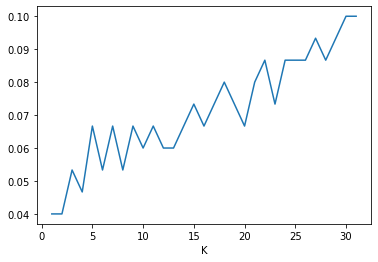

In [174]:
dataSet = []

for index, rows in iris.iterrows():
    my_list =[rows.sepal_length, rows.sepal_width, rows.petal_length,rows.petal_width,rows.type]
    dataSet.append(my_list)


errors = []
differentK=[]

for k in range(1,32):
    differentK.append(k)
    
for k in differentK:
    ten_fold_cv_error = \
           cross_validation(learningFunction=KNN,
                                  argumentOFLearningFunction={'distanceFunction': euclidean_distance,
                                                              'k': k,
                                                              'dataSet': [],
                                                              'instance': []},
                                  dS=dataSet
                                  )

    errors.append(ten_fold_cv_error)


print("Part A:")
for i in zip(differentK, errors):
    print('K={}, \tError={}'.format(i[0], i[1]))


plt.plot(differentK, errors)
plt.xlabel('K')


In [118]:
for i in errors:
    m = 0 
    m += i**2
mse = m/len(errors)
mse

0.0003225806451612904

In [119]:
rmse = math.sqrt(mse)
rmse

0.01796053020267749

In [120]:
for i in errors:
    m = 0 
    m += abs(i)
mae = m / len(errors)
mae

0.0032258064516129032